In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_excel("Facies.xlsx")
df = df[["Porosity","Perm",'AI','Facies']]

In [19]:
df

,Porosity,Perm,AI,Facies
0,0.101319,1.996868,5590.417154,0.0
1,0.147676,10.711789,3470.845666,1.0
2,0.145912,17.818143,3586.988513,1.0
3,0.186167,217.109365,3732.114787,1.0
4,0.146088,16.717367,2534.551236,1.0
...,...,...,...,...
363,0.069584,0.434025,6949.553872,0.0
364,0.134282,17.445625,5003.077228,1.0
365,0.142107,11.625130,3541.132224,1.0
366,0.120072,19.098705,6622.020739,0.0


In [20]:
df.groupby('Facies').mean()

,Porosity,Perm,AI
Facies,,,
0.0,0.098832,3.759187,5406.790720
1.0,0.145992,140.685589,4377.972995


In [22]:
df['Facies'].value_counts()

Facies
1.0    220
0.0    148
Name: count, dtype: int64

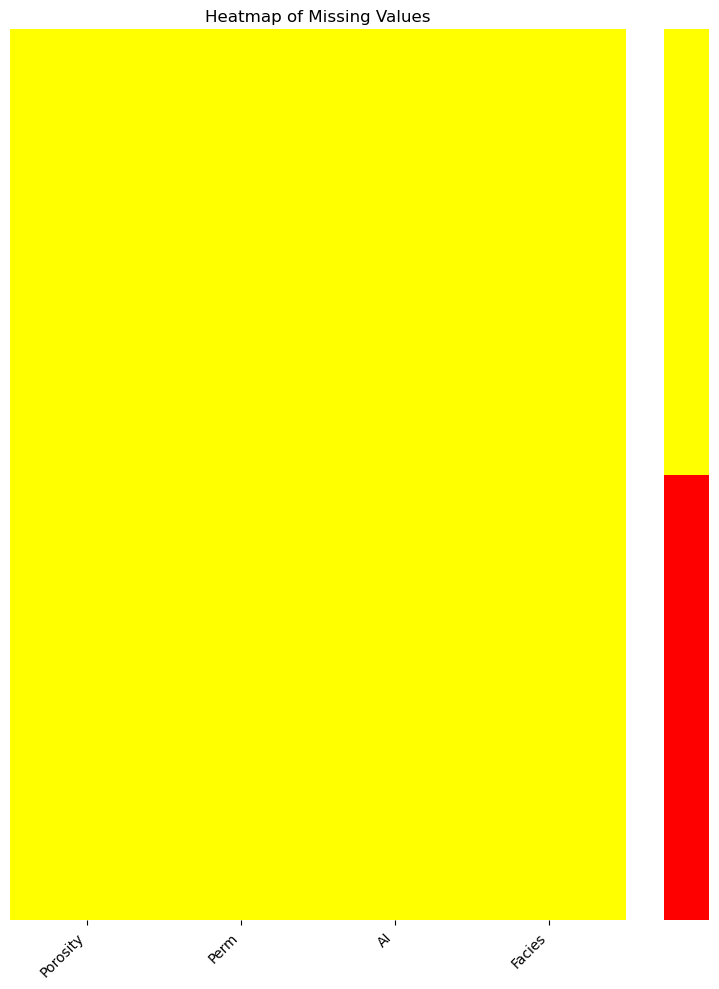

In [23]:
plt.figure(figsize=(8, 10))

heatmap = sns.heatmap(df.isna(), 
                      cmap=['red', 'yellow'],
                      cbar_kws={'ticks': []},
                      xticklabels=True,
                      yticklabels=False)

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('') 

ax = plt.gca()
ax.set_title('Heatmap of Missing Values')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()

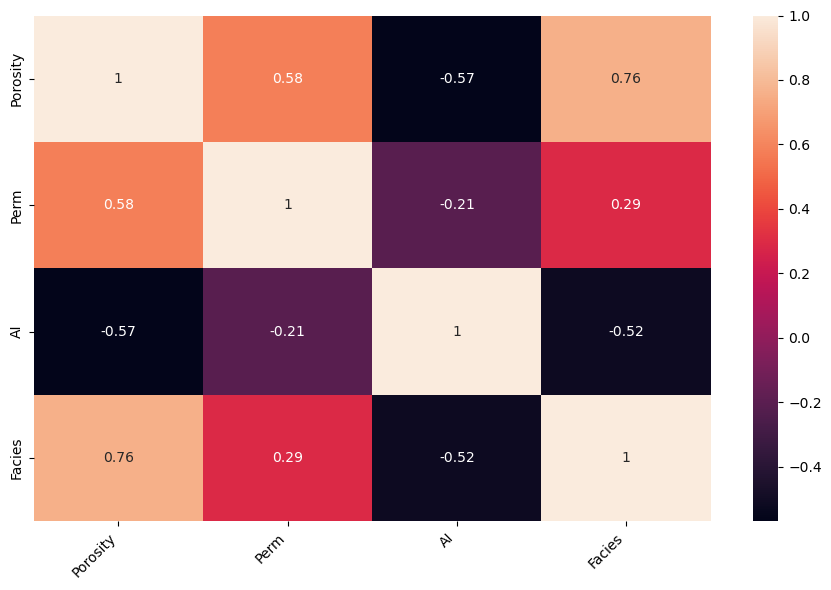

In [30]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr().round(2),annot=True)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

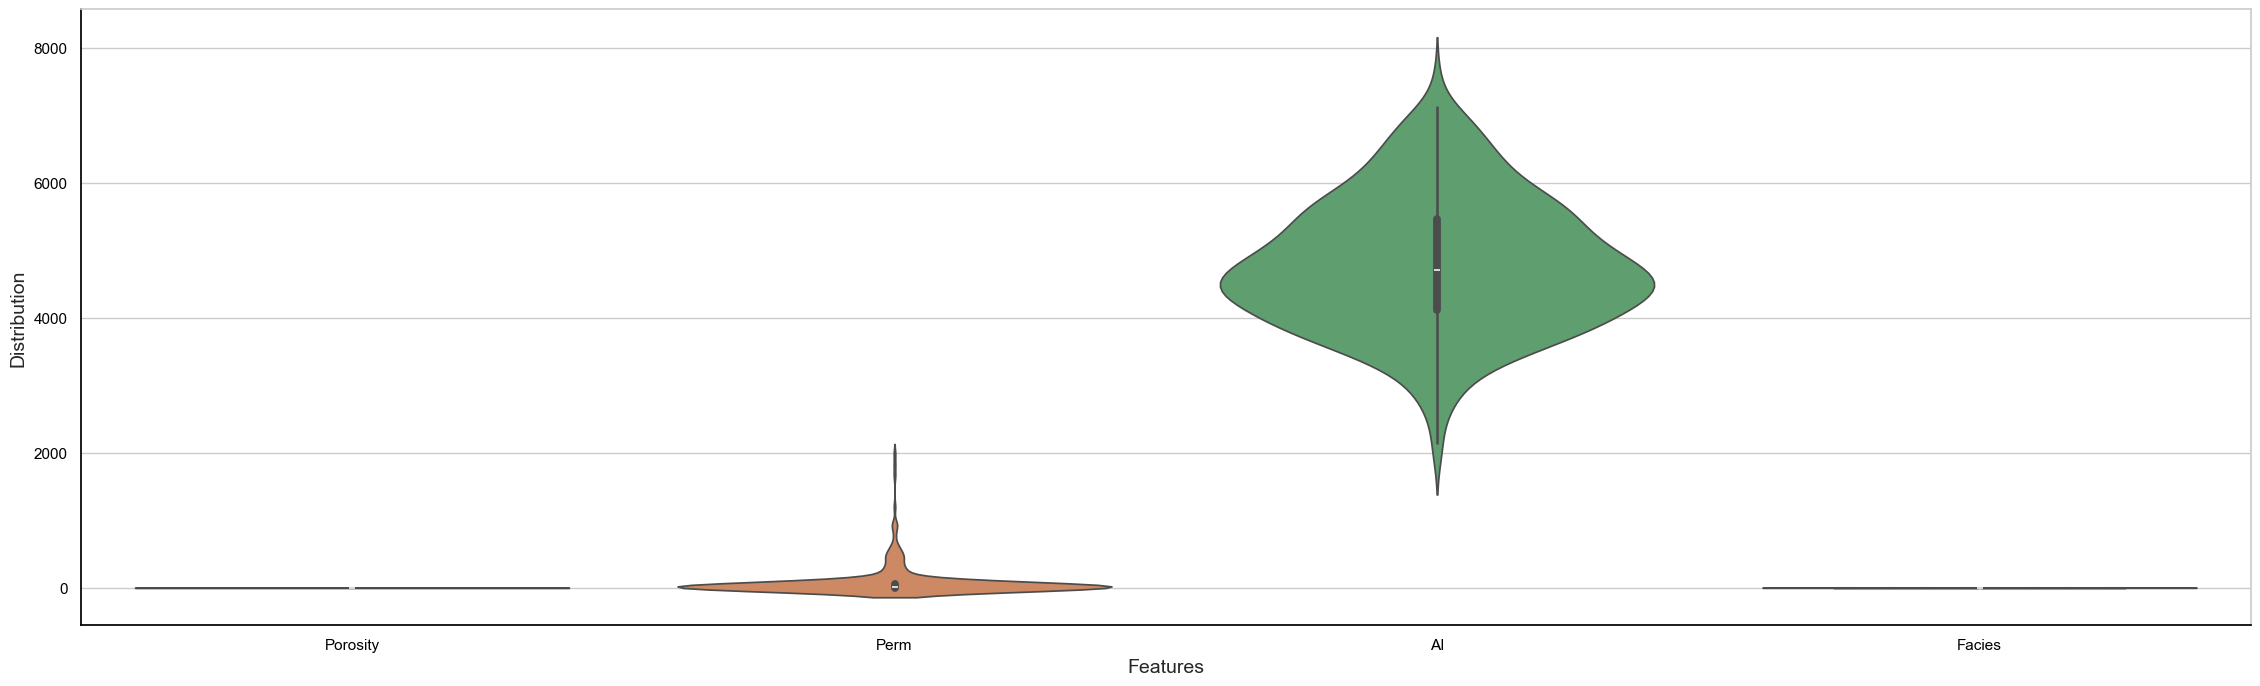

In [32]:
plt.figure(figsize=(28, 8))
sns.set(style='whitegrid')

ax = plt.gca()

vp = sns.violinplot(data=df)

ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Distribution', fontsize=14)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


plt.show()

In [33]:
X = df.drop(columns = 'Facies', axis=1)
y = df['Facies']

In [34]:
scalar = StandardScaler()
scalar.fit(X)
X_Standardized = scalar.transform(X)
X = X_Standardized

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(368, 3) (294, 3) (74, 3)


In [80]:
model = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [81]:
results = {'accuracy':accuracy_score(y_test, y_pred),
    'recall':recall_score(y_test, y_pred, average='weighted'),
    'precision':precision_score(y_test, y_pred, average='weighted'),
    'f1':f1_score(y_test, y_pred, average='weighted')}

results_df = pd.DataFrame([results]).T
results_df


,0
accuracy,0.783784
recall,0.783784
precision,0.782315
f1,0.782458


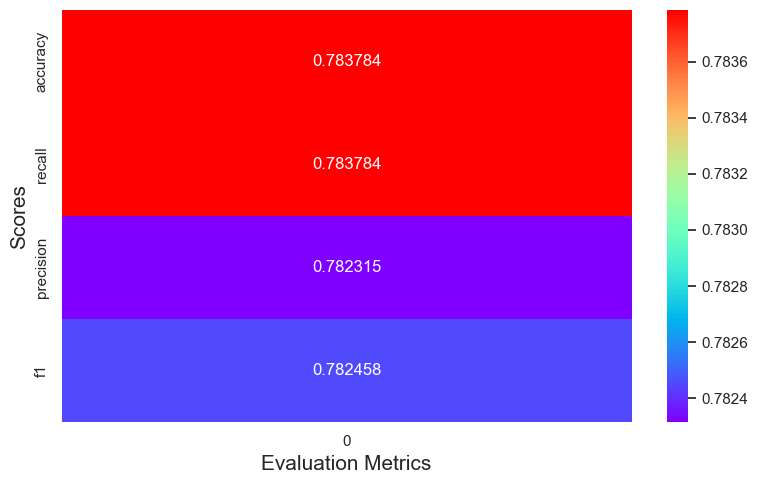

In [82]:
plt.figure(figsize=(8,5))
sns.heatmap(results_df,annot=True,fmt='.6f',cmap="rainbow")
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.tight_layout()
plt.show()

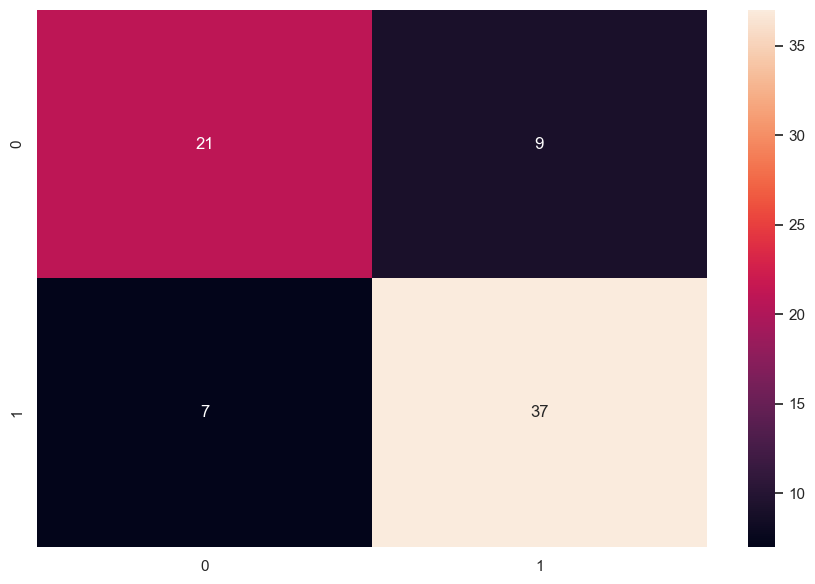

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,6))
sns.heatmap(conf_matrix.round(2),annot=True)

plt.tight_layout()
plt.show()